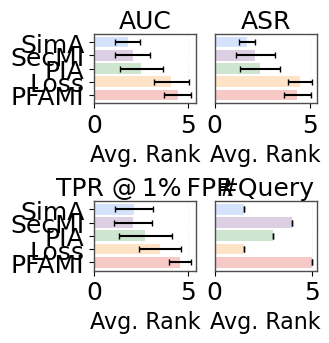

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# ------------------------------------------------------------------
# 1.  DATA  ▸  stack the 15×5×4 tensor exactly as provided
# ------------------------------------------------------------------
SimA  = np.array([[0.8362,0.9045,0.3586,1],[0.8251,0.8985,0.3884,1],[0.9115,0.9634,0.7275,1],
                  [0.7490,0.8285,0.2086,1],[0.8573,0.8977,0.2173,1],[0.8830,0.9180,0.2860,1],
                  [0.8763,0.9303,0.2182,1],[0.6402,0.6782,0.0332,1],[0.6310,0.6651,0.0304,1],
                  [0.6065,0.6334,0.0188,1],[0.6006,0.6248,0.0171,1],[0.6022,0.6325,0.0312,1],
                  [0.6026,0.6328,0.0320,1],[0.5442,0.5359,0.0164,1],[0.5446,0.5366,0.0152,1]])
PIA   = np.array([[0.8506,0.9186,0.2954,2],[0.8231,0.8958,0.2875,2],[0.9083,0.9634,0.6630,2],
                  [0.7427,0.8222,0.1836,2],[0.6465,0.6644,0.0993,2],[0.6267,0.6551,0.0597,2],
                  [0.8991,0.9459,0.3094,2],[0.6310,0.6704,0.0320,2],[0.6238,0.6584,0.0288,2],
                  [0.5987,0.6263,0.0181,2],[0.5932,0.6184,0.0164,2],[0.6052,0.6385,0.0420,2],
                  [0.6056,0.6383,0.0412,2],[0.5362,0.5218,0.0200,2],[0.5368,0.5232,0.0212,2]])
SecMI = np.array([[0.8271,0.8972,0.3344,12],[0.8155,0.8862,0.2995,12],[0.8940,0.9516,0.6620,12],
                  [0.7394,0.8145,0.1455,12],[0.7797,0.8255,0.3473,12],[0.6888,0.7361,0.1520,12],
                  [0.8139,0.8785,0.3405,12],[0.6510,0.7015,0.0492,12],[0.6438,0.6911,0.0432,12],
                  [0.6163,0.6550,0.0342,12],[0.6114,0.6459,0.0285,12],[0.5680,0.5862,0.0276,12],
                  [0.5674,0.5859,0.0292,12],[0.5560,0.5592,0.0128,12],[0.5566,0.5605,0.0120,12]])
PFAMI = np.array([[0.7364,0.8032,0.0816,20],[0.7058,0.7705,0.0844,20],[0.7478,0.8374,0.1700,20],
                  [0.6434,0.7018,0.0813,20],[0.6785,0.7222,0.0377,20],[0.6807,0.7247,0.0427,20],
                  [0.5000,0.1897,0.0000,20],[0.6256,0.6626,0.0248,20],[0.6188,0.6538,0.0228,20],
                  [0.5960,0.6220,0.0186,20],[0.5920,0.6157,0.0175,20],[0.5004,0.4101,0.0088,20],
                  [0.5002,0.4084,0.0080,20],[0.5204,0.4883,0.0044,20],[0.5196,0.4871,0.0044,20]])
Loss = np.array([[0.7767,0.8473,0.2414,1],[0.7485,0.8219,0.1956,1],[0.8460,0.9142,0.4767,1],
                  [0.6913,0.7596,0.1515,1],[0.5727,0.6038,0.0700,1],[0.5737,0.6053,0.0707,1],
                  [0.8020,0.8789,0.2470,1],[0.5914,0.6267,0.0356,1],[0.5854,0.6166,0.0344,1],
                  [0.5653,0.5887,0.0191,1],[0.5610,0.5829,0.0183,1],[0.5012,0.3697,0.0080,1],
                  [0.5012,0.3696,0.0080,1],[0.5546,0.4927,0.0040,1],[0.5544,0.4928,0.0040,1]])

data = np.stack([SimA, SecMI, PIA, Loss, PFAMI], axis=1)

method_names  = ['SimA', 'SecMI', 'PIA', 'Loss', 'PFAMI']
metric_names  = ['AUC', 'ASR', 'TPR @ 1% FPR', '#Query']
larger_is_better = [True, True, True, False]

method_colors = {
    'SimA':  (212/255, 227/255, 251/255),   # light-blue   square (top-left)
    'PIA':   (206/255, 229/255, 207/255),   # light-green  square (top-right)
    'SecMI': (221/255, 207/255, 227/255),   # light-violet square (bottom-right)
    'PFAMI': (246/255, 200/255, 198/255),   # light-rose   square (bottom-left)
    'Loss':  (255/255, 227/255, 199/255),   # light-orange stand-alone swatch
}

# ------------------------------------------------------------------
# 2.  RANKS
# ------------------------------------------------------------------
n_exp, n_methods, n_metrics = data.shape
avg_ranks = np.zeros((n_metrics, n_methods))
std_ranks = np.zeros((n_metrics, n_methods))

for m in range(n_metrics):
    per_exp = []
    for e in range(n_exp):
        vals = data[e, :, m]
        if larger_is_better[m]:
            vals = -vals
        per_exp.append(rankdata(vals, method='average'))
    per_exp = np.vstack(per_exp)
    avg_ranks[m] = per_exp.mean(0)
    std_ranks[m] = per_exp.std(0)

# ------------------------------------------------------------------
# 3.  PLOT  ▸  2 × 2 grid, single‑column width (~3.25")
#            height chosen so each panel is ~square
# ------------------------------------------------------------------
plt.rcParams.update({'font.size': 7})
fig, axes = plt.subplots(2, 2, figsize=(3.3, 3.45))   # ~square panels
axes = axes.flatten()

for idx, ax in enumerate(axes):
    ax.barh(
        y=np.arange(n_methods),
        width=avg_ranks[idx],
        xerr=std_ranks[idx],
        color=[method_colors[n] for n in method_names],
        edgecolor='none',
        align='center',
        capsize=2,
    )
    ax.invert_yaxis()
    ax.set_title(metric_names[idx], pad=4)

    # y‑tick labels only on left column; no separate y‑axis label
    if idx % 2 == 0:
        ax.set_yticks(np.arange(n_methods))
        ax.set_yticklabels(method_names)
    else:
        ax.set_yticks([])

    ax.set_xlabel('Avg. Rank')
    ax.grid(axis='x', linestyle='--', alpha=0.4, linewidth=0.5)

# fig.suptitle('Average Method Ranks across 15 Experiments', y=1.03, fontsize=8)
plt.tight_layout()

# ------------------------------------------------------------------
# 4.  SAVE VECTOR PDF FOR AAAI SINGLE COLUMN
# ------------------------------------------------------------------
fig.savefig('/home/ethanrao/MIA_Diffusion/figures/benchmark_ranks.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [5]:
import numpy as np
coco_test = np.load('/banana/ethan/MIA_data/MSCOCO/SimA/coco_test.npy')
pokemon = np.load('/banana/ethan/MIA_data/MSCOCO/SimA/pokemon.npy')
coco_train = np.load('/banana/ethan/MIA_data/MSCOCO/SimA/coco_train.npy')

In [6]:
coco_train.mean(-1)

array([ 253.38667, 1999.258  , 2832.6982 , 3417.5977 , 3808.282  ,
       4097.8184 , 4330.6147 , 4524.209  , 4678.723  , 4811.4087 ,
       4918.5703 , 5015.596  , 5096.449  , 5169.6606 , 5236.1826 ,
       5293.2007 , 5344.452  , 5387.088  , 5434.3105 , 5470.168  ],
      dtype=float32)

In [7]:
coco_test.mean(-1)

array([ 235.94977, 1921.9684 , 2787.8516 , 3432.9033 , 3894.0312 ,
       4254.9717 , 4562.5166 , 4829.285  , 5051.639  , 5250.0107 ,
       5416.4136 , 5568.772  , 5700.752  , 5821.9966 , 5931.243  ,
       6027.5527 , 6117.785  , 6199.8223 , 6280.415  , 6347.2734 ],
      dtype=float32)

In [8]:
pokemon.mean(-1)

array([1113.1759, 3134.9072, 3754.8438, 4038.7346, 4110.3003, 4072.749 ,
       3997.588 , 3888.126 , 3762.9087, 3637.3516, 3508.691 , 3400.0002,
       3282.7004, 3183.3271, 3086.9226, 2999.9543, 2910.4834, 2825.0117,
       2758.4448, 2693.1973], dtype=float32)

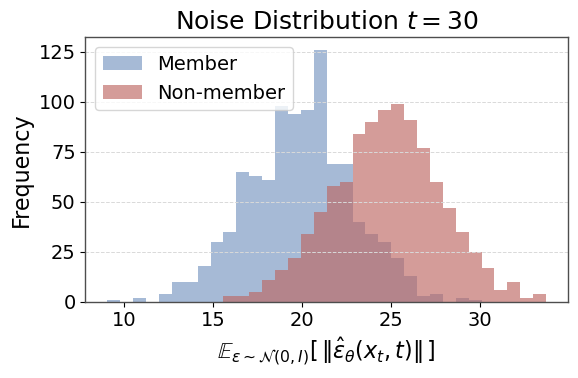

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Dummy data – swap these with your real ‖ε̂‖₂ arrays
# ------------------------------------------------------------------
rng = np.random.default_rng(seed=42)
train_norms = rng.normal(loc=20, scale=3, size=1_000)
test_norms  = rng.normal(loc=25, scale=3, size=1_000)

# ------------------------------------------------------------------
# 2)  Colours copied from your scatter‑plot
#     light‑blue → Train   |   light‑red → Test
# ------------------------------------------------------------------
TRAIN_COLOUR = "#7695C0"   # RGB ≈ (118,149,193)
TEST_COLOUR  = "#BD6763"   # RGB ≈ (189,103, 99)

# ------------------------------------------------------------------
# 3)  Matplotlib settings for an “academic” look
# ------------------------------------------------------------------
plt.rcParams.update({
    "font.size":        14,
    "axes.titlesize":   18,
    "axes.labelsize":   16,
    "axes.edgecolor":   "0.3",
    "axes.linewidth":   1.0,
    "grid.color":       "0.85",
    "grid.linestyle":   "--",
    "grid.linewidth":   0.7,
})

fig, ax = plt.subplots(figsize=(6, 4))

# ------------------------------------------------------------------
# 4)  Overlayed histograms (α ≈ 0.65 gives nice transparency)
# ------------------------------------------------------------------
bins = np.linspace(
    min(train_norms.min(), test_norms.min()),
    max(train_norms.max(), test_norms.max()),
    35                    # 35 bins → smooth curve; tweak as you like
)

ax.hist(train_norms, bins=bins,
        color=TRAIN_COLOUR, alpha=0.65, label="Member")
ax.hist(test_norms,  bins=bins,
        color=TEST_COLOUR, alpha=0.65, label="Non-member")

# ------------------------------------------------------------------
# 5)  Labels, legend, tidy‑up
# ------------------------------------------------------------------
ax.set_xlabel(r"$\mathbb{E}_{\varepsilon \sim \mathcal{N}(0,I)}"
    r"[\,\Vert\hat{\varepsilon}_{\theta}(x_t,t)\Vert\,]$")
ax.set_ylabel("Frequency")
ax.set_title(r"Noise Distribution $t=30$")
ax.legend(frameon=True)
ax.grid(True, axis='y', zorder=-1)

fig.tight_layout()

fig.savefig("/home/ethanrao/MIA_Diffusion/figures/norm_freq_dist.png", dpi=300, bbox_inches="tight")
plt.show()


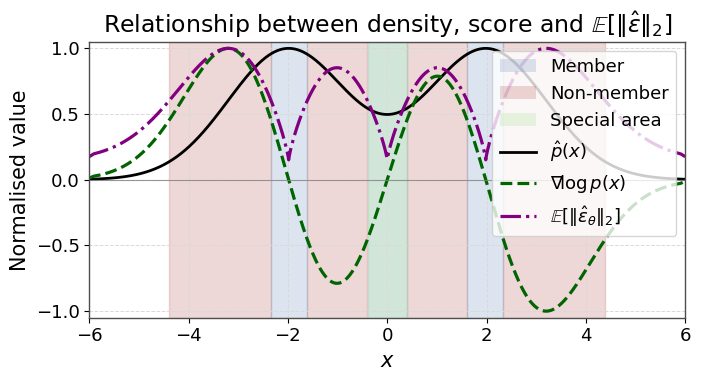

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Illustrative data -------------------------------------------------
x = np.linspace(-6, 6, 2000)

pdf = (0.5 * np.exp(-0.5 * ((x + 2) / 1.2)**2) +   # two-peak proxy density
       0.5 * np.exp(-0.5 * ((x - 2) / 1.2)**2))
pdf /= pdf.max()                                   # normalise to [0,1]

score = np.convolve(np.gradient(pdf, x), np.ones(31)/31, mode='same')
score /= np.abs(score).max()

eps_norm = 0.15 + 0.85 * np.abs(score)**0.8
eps_norm /= eps_norm.max()

# 2) Member / Non-member labels over full x ---------------------------
thr = 0.6
labels = np.where(eps_norm < thr, 1, 2)   # 1 = Member (low E[||ε||]), 2 = Non-member
member_col, nonmember_col = "#7695C0", "#BD6763"
highlight_col = "#BDE8B0"  # light green

# 3) Matplotlib styling -------------------------------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 17,
    "axes.labelsize": 15,
    "grid.color": "0.85",
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
})

fig, ax = plt.subplots(figsize=(7.2, 4.0))

def contiguous_segments(idx):
    if idx.size == 0:
        return []
    splits = np.where(np.diff(idx) != 1)[0] + 1
    segs = np.split(idx, splits)
    return [seg for seg in segs if seg.size > 0]

# shade Non-member (all)
idx_non = np.where(labels == 2)[0]
for seg in contiguous_segments(idx_non):
    ax.axvspan(x[seg[0]], x[seg[-1]], color=nonmember_col, alpha=0.25, zorder=-2)

# shade Member but drop leftmost and rightmost blue regions
idx_mem = np.where(labels == 1)[0]
mem_segs = contiguous_segments(idx_mem)

# Keep only interior segments (skip first and last by x-order)
if len(mem_segs) > 2:
    interior_mem_segs = mem_segs[1:-1]
else:
    interior_mem_segs = []  # if <=2 segments, no interior spans

for seg in interior_mem_segs:
    ax.axvspan(x[seg[0]], x[seg[-1]], color=member_col, alpha=0.25, zorder=-2)

# Highlight the *center* member region that contains x=0
center_seg = None
for seg in interior_mem_segs:
    if x[seg[0]] <= 0 <= x[seg[-1]]:
        center_seg = seg
        break

if center_seg is not None:
    # draw a light-green overlay slightly above other spans
    ax.axvspan(x[center_seg[0]], x[center_seg[-1]],
               color=highlight_col, alpha=0.35, zorder=-1)

# curves: density, score, expectation
ax.plot(x, pdf,      color='black',     lw=2.0, label=r"$\hat{p}(x)$")
ax.plot(x, score,    color='darkgreen', ls='--', lw=2.3, label=r"$\nabla\!\log p(x)$")
ax.plot(x, eps_norm, color='purple',    ls='-.',  lw=2.3,
        label=r"$\mathbb{E}[\Vert\hat{\varepsilon}_{\theta}\Vert_{2}]$")

# axis cosmetics
ax.axhline(0, color='grey', lw=0.8, alpha=0.8)
ax.set_xlabel(r"$x$")
ax.set_ylabel("Normalised value")
ax.set_title(r"Relationship between density, score and $\mathbb{E}[‖\hat{ε}‖_2]$")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.05, 1.05)

# legend
patches = [
    Patch(facecolor=member_col,    alpha=0.25, label="Member"),
    Patch(facecolor=nonmember_col, alpha=0.25, label="Non-member"),
    Patch(facecolor=highlight_col, alpha=0.35, label="Special area")
]
line_h, line_l = ax.get_legend_handles_labels()
ax.legend(patches + line_h,
          [p.get_label() for p in patches] + line_l,
          loc='upper right', frameon=True)

ax.grid(True, zorder=-3)
fig.tight_layout()

# fig.savefig("relation_density_score_epsnorm.png", dpi=300, bbox_inches="tight")
plt.show()


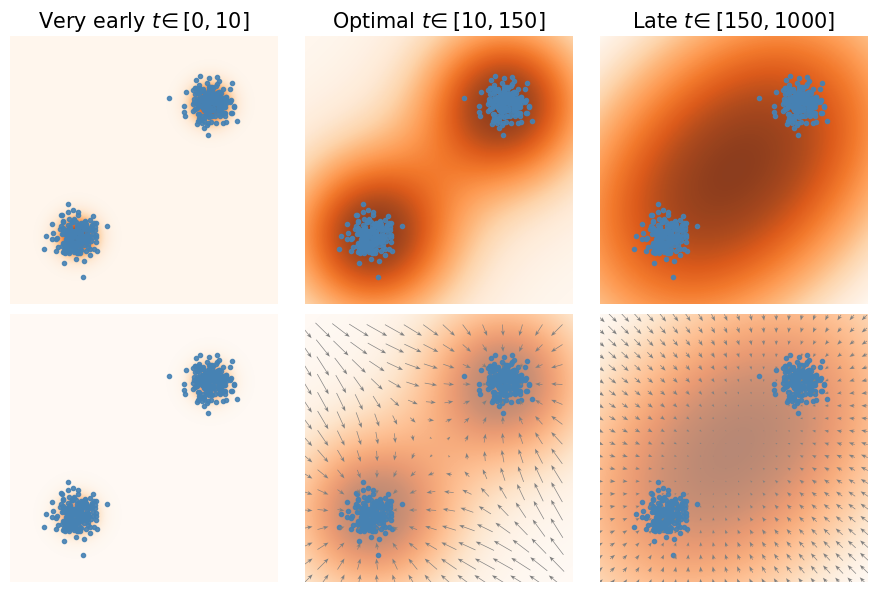

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def make_figure(save_prefix="score_density_custom_titles"):
    # configuration
    sigmas       = (0.05, 0.22, 0.45)
    arrow_stride = {0: None, 1: 10, 2: 7}       # no arrows in column 0
    arrow_scale  = {1: 90, 2: 70}
    g, n_samples = 150, 200
    rng          = np.random.default_rng(0)

    # two Gaussian clusters (training samples)
    μ1, μ2 = np.array([.25, .25]), np.array([.75, .75])
    samples = np.vstack([
        μ1 + 0.04 * rng.standard_normal((n_samples, 2)),
        μ2 + 0.04 * rng.standard_normal((n_samples, 2))])

    # grid
    x  = np.linspace(0, 1, g)
    xx, yy = np.meshgrid(x, x)
    pts = np.stack([xx.ravel(), yy.ravel()], 1)

    titles = [
        r"Very early $t\!\in[0,10]$",
        r"Optimal $t\!\in[10,150]$",
        r"Late $t\!\in[150,1000]$"
    ]

    fig, ax = plt.subplots(2, 3, figsize=(9, 6))
    for row in ax:
        for a in row:
            a.set_xticks([]); a.set_yticks([]); a.set_aspect("equal")
            for sp in a.spines.values(): sp.set_visible(False)

    # loop over the three columns
    for col, σ in enumerate(sigmas):
        rv1, rv2 = multivariate_normal(μ1, σ**2*np.eye(2)), multivariate_normal(μ2, σ**2*np.eye(2))
        p  = 0.5*rv1.pdf(pts) + 0.5*rv2.pdf(pts)
        if col == 1:                                                # slight blur for optimal-t
            p += 0.08*multivariate_normal([.5,.5], .28**2*np.eye(2)).pdf(pts)
        P = p.reshape(g, g)

        diff1, diff2 = (μ1-pts)/σ**2, (μ2-pts)/σ**2
        score = (0.5*rv1.pdf(pts)[:,None]*diff1 +
                 0.5*rv2.pdf(pts)[:,None]*diff2) / p[:,None]
        score = score.reshape(g, g, 2)

        # ── top panel: density + blue dots ─────────────────────────
        ax[0, col].imshow(P.T, origin="lower", extent=[0,1,0,1],
                          cmap="Oranges", alpha=.9, interpolation="bilinear")
        ax[0, col].scatter(samples[:,0], samples[:,1],
                           s=9, color="steelblue", alpha=.9)
        ax[0, col].set_title(titles[col], fontsize=15, pad=6)       # ← bigger titles

        # ── bottom panel ───────────────────────────────────────────
        ax[1, col].imshow(P.T, origin="lower", extent=[0,1,0,1],
                          cmap="Oranges", alpha=.55, interpolation="bilinear")
        ax[1, col].scatter(samples[:,0], samples[:,1],
                           s=9, color="steelblue", alpha=.9)

        if arrow_stride[col] is not None:                           # arrows for optimal & late
            s, sc = arrow_stride[col], arrow_scale[col]
            ax[1, col].quiver(xx[::s, ::s], yy[::s, ::s],
                              score[::s, ::s, 0], score[::s, ::s, 1],
                              angles="xy", scale_units="xy", scale=sc,
                              headwidth=6, headlength=8, headaxislength=6,
                              width=0.0025, color="gray", pivot="mid")

    plt.tight_layout()
    fig.savefig(f"/home/ethanrao/MIA_Diffusion/figures/{save_prefix}.pdf")
    fig.savefig(f"/home/ethanrao/MIA_Diffusion/figures/{save_prefix}.svg")

if __name__ == "__main__":
    make_figure()


Saved → metrics_row_light_orange_bg.png


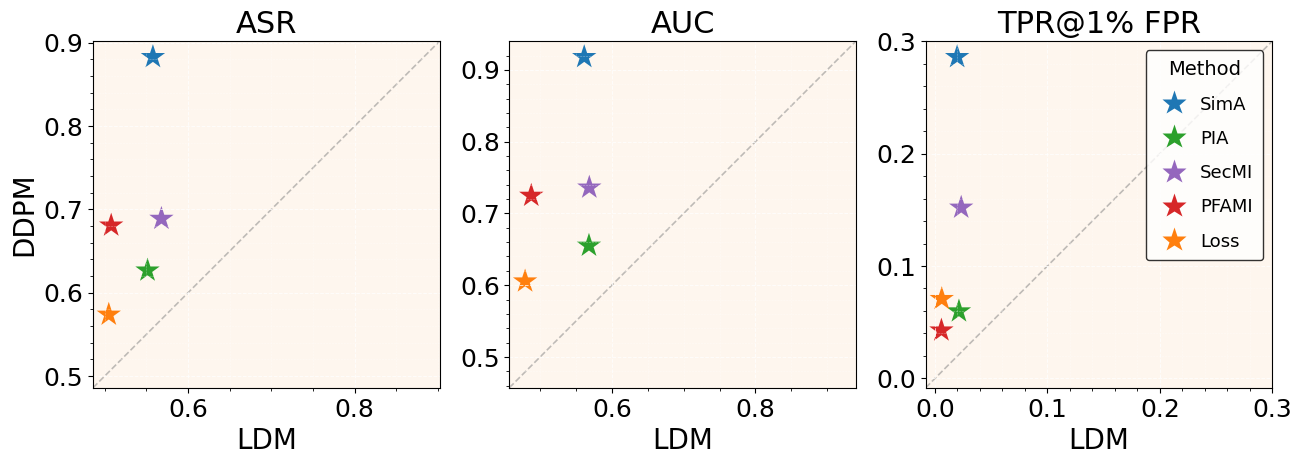

In [56]:
"""
DDPM vs. LDM (1 × 3) — light-orange background, XXL text, opaque stars
Background color: #FEF6EE  (RGB 254, 246, 238)
Saves: metrics_row_light_orange_bg.png
"""

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# ── 0) Global typography: big plot text, compact legend ───────────────────────
mpl.rcParams.update({
    'axes.titlesize':   22,
    'axes.labelsize':   20,
    'xtick.labelsize':  18,
    'ytick.labelsize':  18,
    'legend.title_fontsize': 14,   # keep legend compact
    'legend.fontsize':       13,
})

# ── 1) Data ───────────────────────────────────────────────────────────────────
method_data = {
    'SimA':  {'DDPM': [0.883, 0.918, 0.286], 'LDM': [0.5578, 0.5614, 0.0197]},
    'PIA':   {'DDPM': [0.6267, 0.6551, 0.0597], 'LDM': [0.5513, 0.5680, 0.0213]},
    'SecMI': {'DDPM': [0.6888, 0.7361, 0.152], 'LDM': [0.5680, 0.5685, 0.0233]},
    'PFAMI': {'DDPM': [0.6807, 0.7247, 0.0427], 'LDM': [0.5077, 0.4876, 0.0057]},
    'Loss':  {'DDPM': [0.5737, 0.6053, 0.0707], 'LDM': [0.5048, 0.4790, 0.0060]},
}

# Saturated, high-contrast colors (opaque)
method_colors = {
    'SimA':  '#1f77b4',  # deep blue
    'PIA':   '#2ca02c',  # vivid green
    'SecMI': '#9467bd',  # rich purple
    'PFAMI': '#d62728',  # strong red
    'Loss':  '#ff7f0e',  # bold orange
}

metrics   = ['ASR', 'AUC', 'TPR@1% FPR']
star_size = 340  # large ★ markers

# ── 2) Background color (light orange) ────────────────────────────────────────
axes_bg = (254/255, 246/255, 238/255)  # #FEF6EE

# ── 3) Figure layout: bigger canvas, tight gaps ───────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(13.2, 4.5), constrained_layout=False)
# If you also want the outer figure background to match, uncomment:
# fig.patch.set_facecolor(axes_bg)

plt.subplots_adjust(left=0.055, right=0.995, top=0.92, bottom=0.15, wspace=0.02)

for idx, (metric, ax) in enumerate(zip(metrics, axes)):
    ax.set_facecolor(axes_bg)

    # Scatter points
    xs, ys = [], []
    for name, color in method_colors.items():
        x = method_data[name]['LDM'][idx]
        y = method_data[name]['DDPM'][idx]
        xs.append(x); ys.append(y)
        ax.scatter(x, y,
                   marker='*', s=star_size,
                   color=color, edgecolors='none', linewidths=0,
                   alpha=1.0)  # fully opaque

    # Equal axis limits + y = x reference
    lo, hi = min(xs + ys), max(xs + ys)
    pad = 0.05 * (hi - lo)
    ax.set_xlim(lo - pad, hi + pad)
    ax.set_ylim(lo - pad, hi + pad)
    ax.set_aspect('equal', adjustable='box')
    ax.plot([lo - pad, hi + pad], [lo - pad, hi + pad],
            linestyle='--', linewidth=1.2, color='gray', alpha=0.5, zorder=0)

    # Labels & title
    ax.set_xlabel(f'LDM')
    ax.set_ylabel(f'DDPM' if idx == 0 else '')
    ax.set_title(metric, pad=6)

    # Visible grid (tuned for light-orange background)
    ax.minorticks_on()
    ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='#FFFFFF', alpha=0.75)
    ax.grid(True, which='minor', linestyle='--', linewidth=0.4, color='#FFFFFF', alpha=0.45)

    # Legend (only on the right-most panel)
    if idx == 2:
        handles = [
            plt.Line2D([], [], marker='*', linestyle='',
                       markersize=np.sqrt(star_size),
                       markerfacecolor=method_colors[m],
                       markeredgecolor='none', label=m)
            for m in method_data.keys()
        ]
        ax.legend(
            handles=handles, title='Method',
            loc='upper right',
            frameon=True, facecolor='white', edgecolor='black',
            labelspacing=0.9, borderpad=0.55, handletextpad=0.45
        )

# ── 4) Save ───────────────────────────────────────────────────────────────────
fig.savefig('/home/ethanrao/MIA_Diffusion/figures/ddpm_ldm_compare.pdf', dpi=300)
print('Saved → metrics_row_light_orange_bg.png')


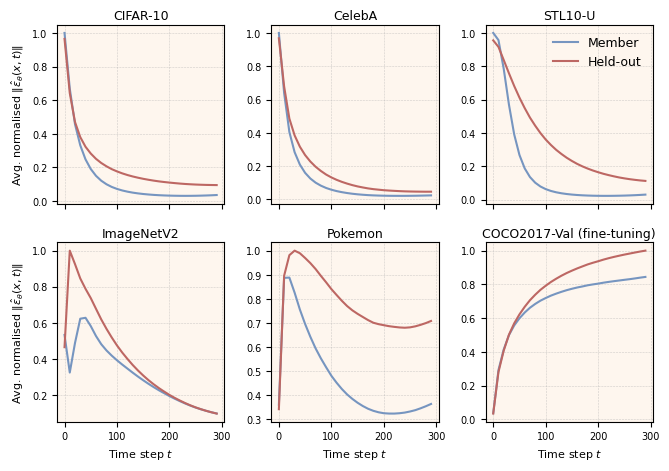

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Your real data here
# ------------------------------------------------------------------


num_timesteps = 30
experiments = [
    (np.load('/banana/ethan/MIA_data/CIFAR10/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/CIFAR10/SimA/test_300.npy').mean(1)[:30], 'CIFAR-10'),
    (np.load('/banana/ethan/MIA_data/CELEBA/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/CELEBA/SimA/test_300.npy').mean(1)[:30], 'CelebA'),
    (np.load('/banana/ethan/MIA_data/STL10-U/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/STL10-U/SimA/test_300.npy').mean(1)[:30], 'STL10-U'),
    (np.load('/banana/ethan/MIA_data/IMAGENETv2/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/IMAGENETv2/SimA/test_300.npy').mean(1)[:30], 'ImageNetV2'),
    (np.load('/banana/ethan/MIA_data/POKEMON/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/POKEMON/SimA/test_300.npy').mean(1)[:30], 'Pokemon'),
    (np.load('/banana/ethan/MIA_data/MSCOCO/SimA/train_300.npy').mean(1)[:30], np.load('/banana/ethan/MIA_data/MSCOCO/SimA/test_300.npy').mean(1)[:30], 'COCO2017-Val (fine-tuning)'),
]

# ------------------------------------------------------------------
# 2)  Styling
# ------------------------------------------------------------------
axes_bg       = (254/255, 246/255, 238/255)
MEMBER_COLOR  = "#7695C0"
HELDOUT_COLOR = "#BD6763"
y_label_txt   = r"Avg. normalised $\|\hat{\varepsilon}_\theta(x,t)\|$"

# ------------------------------------------------------------------
# 3)  Build the 2 × 3 grid
# ------------------------------------------------------------------
fig, axes = plt.subplots(
    2, 3,
    figsize=(6.8, 4.5),    # two-column width
    sharex=True, sharey=False
)

for i, ax in enumerate(axes.ravel(), start=1):
    member_raw, held_raw, exp_name = experiments[i-1]
    scale = max(member_raw.max(), held_raw.max())
    t = np.arange(0, 300, 10)

    ax.plot(t, member_raw/scale, color=MEMBER_COLOR,  lw=1.5,
            label="Member"  if i == 3 else None)
    ax.plot(t, held_raw/scale,   color=HELDOUT_COLOR, lw=1.5,
            label="Held-out" if i == 3 else None)

    ax.set_facecolor(axes_bg)
    ax.grid(True, ls="--", lw=0.4, alpha=0.6)
    ax.set_title(f"{exp_name}", fontsize=9, pad=4)

    if i in (1, 4):
        ax.set_ylabel(y_label_txt, fontsize=8)
    if i > 3:
        ax.set_xlabel(r"Time step $t$", fontsize=8)

    ax.tick_params(labelsize=7)

# ------------------------------------------------------------------
# 4)  Add legend only to **upper-right** subplot (axes[0, 2])
# ------------------------------------------------------------------
axes[0, 2].legend(loc="upper right", frameon=False, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)   # tweak if needed

fig.savefig("/home/ethanrao/MIA_Diffusion/figures/norm_magnitude.pdf", bbox_inches="tight")
plt.show()





/tmp/ipykernel_3348643/221671115.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


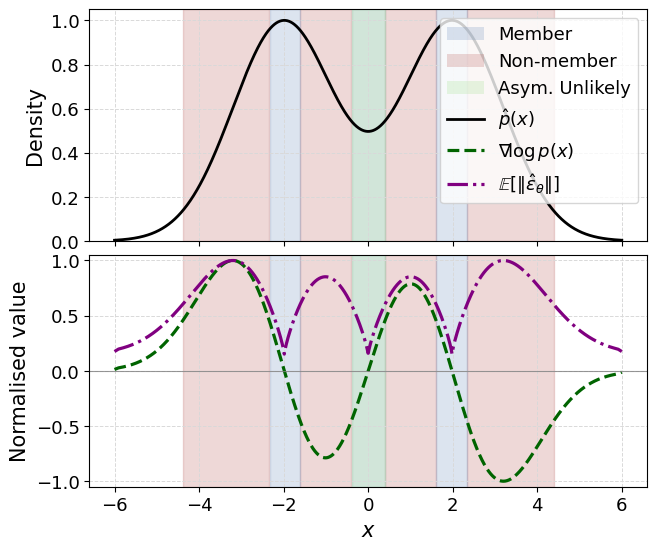

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Illustrative data -------------------------------------------------
x = np.linspace(-6, 6, 2000)

pdf = (0.5 * np.exp(-0.5 * ((x + 2) / 1.2)**2) +   # two-peak proxy density
       0.5 * np.exp(-0.5 * ((x - 2) / 1.2)**2))
pdf /= pdf.max()                                   # normalise to [0,1]

score = np.convolve(np.gradient(pdf, x), np.ones(31)/31, mode='same')
score /= np.abs(score).max()

eps_norm = 0.15 + 0.85 * np.abs(score)**0.8
eps_norm /= eps_norm.max()

# 2) Member / Non-member labels over full x ---------------------------
thr = 0.6
labels = np.where(eps_norm < thr, 1, 2)   # 1 = Member (low E[||ε||]), 2 = Non-member
member_col, nonmember_col = "#7695C0", "#BD6763"
highlight_col = "#BDE8B0"  # light green

# 3) Matplotlib styling -------------------------------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 17,
    "axes.labelsize": 15,
    "grid.color": "0.85",
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
})

def contiguous_segments(idx):
    if idx.size == 0:
        return []
    splits = np.where(np.diff(idx) != 1)[0] + 1
    segs = np.split(idx, splits)
    return [seg for seg in segs if seg.size > 0]

# Precompute regions once so both subplots use the same shading
idx_non = np.where(labels == 2)[0]
nonmem_segs = contiguous_segments(idx_non)

idx_mem = np.where(labels == 1)[0]
mem_segs_all = contiguous_segments(idx_mem)

# Keep only interior member segments (skip leftmost & rightmost)
if len(mem_segs_all) > 2:
    mem_segs_interior = mem_segs_all[1:-1]
else:
    mem_segs_interior = []

# Center member segment containing x=0 (if any)
center_seg = None
for seg in mem_segs_interior:
    if x[seg[0]] <= 0 <= x[seg[-1]]:
        center_seg = seg
        break

def shade_regions(ax):
    for seg in nonmem_segs:
        ax.axvspan(x[seg[0]], x[seg[-1]], color=nonmember_col, alpha=0.25, zorder=-2)
    for seg in mem_segs_interior:
        ax.axvspan(x[seg[0]], x[seg[-1]], color=member_col, alpha=0.25, zorder=-2)
    if center_seg is not None:
        ax.axvspan(x[center_seg[0]], x[center_seg[-1]],
                   color=highlight_col, alpha=0.35, zorder=-1)

# -------------------- Combined figure (two rows) ----------------------
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, figsize=(7.2, 6.2), sharex=True, gridspec_kw={'hspace': 0.06}
)

# Top: p(x) only
shade_regions(ax_top)
line_top, = ax_top.plot(x, pdf, color='black', lw=2.0, label=r"$\hat{p}(x)$")
ax_top.set_ylabel("Density")
ax_top.set_ylim(0.0, 1.05)
ax_top.grid(True, zorder=-3)
# Remove x-axis ticks/labels on the top panel
ax_top.tick_params(axis='x', which='both', labelbottom=False)
ax_top.set_xlabel("")  # no x label on top

# Bottom: score & E[||ε||]
shade_regions(ax_bot)
line_score, = ax_bot.plot(x, score,    color='darkgreen', ls='--', lw=2.3, label=r"$\nabla\!\log p(x)$")
line_eps,   = ax_bot.plot(x, eps_norm, color='purple',    ls='-.',  lw=2.3,
                          label=r"$\mathbb{E}[\Vert\hat{\varepsilon}_{\theta}\Vert]$")
ax_bot.axhline(0, color='grey', lw=0.8, alpha=0.8)
ax_bot.set_xlabel(r"$x$")
ax_bot.set_ylabel("Normalised value")
ax_bot.set_ylim(-1.05, 1.05)
ax_bot.grid(True, zorder=-3)

# Legend: merged and placed in the TOP subplot
patches = [
    Patch(facecolor=member_col,    alpha=0.25, label="Member"),
    Patch(facecolor=nonmember_col, alpha=0.25, label="Non-member"),
    Patch(facecolor=highlight_col, alpha=0.35, label="Asym. Unlikely"),
]
handles = patches + [line_top, line_score, line_eps]
labels  = [h.get_label() for h in handles]
ax_top.legend(handles, labels, loc='upper right', frameon=True)

fig.tight_layout()
fig.savefig("/home/ethanrao/MIA_Diffusion/figures/plots_density_score.png", bbox_inches="tight")
plt.show()
